## 1. Logistic Regression

Hàm mục tiêu của Logistic Regression: $ \hat{y} = \sigma(x \theta ^T)$

Hàm mất mát: $L( \theta )  = - \frac{1}{m}  \sum_{i=1}^{m} ( y^i log(\hat{y} ^i) + (1-y^i) log(1- \hat{y}^i)  )$

Bộ dữ liệu áp dụng: Iris. Bộ này được cung cấp và hỗ trợ sẵn bởi thư viện sklearn. Dữ liệu huấn luyện cho bài toán phân lớp sẽ gồm 2 phần:

X: các thuộc tính của dữ liệu. Có tổng cộng 4 thuộc tính gồm Sepal Length, Sepal Width, Petal Length, Petal Width.

y: thuộc tính nhãn. Có 3 nhãn gồm Setosa, Versicolour, and Virginica

In [1]:
from sklearn.datasets import load_iris # import the iris dataset
import numpy as np # import numpy
iris = load_iris() # load the iris dataset

Trong bài này, chúng ta sẽ dùng thuộc tính Petal Width để phân loại xem loài hoa đang xét có phải là Virginica hay không 

=> phân lớp nhị phân với 2 nhãn: Virginica (1) và không phải Virginica (2).

In [57]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int_) # 1 if Iris-Virginica, else 0

In [30]:
#Tạo dữ liệu dự đoán: sinh ra ngẫu nhiên 100 phần tử tương ứng với Petal Width trong khoảng giá trị từ 0 - 3 cm.
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

## 2.Gradient Descent

Vector gradient của $\theta$: $\frac{L(\theta)}{d\theta} = \frac{1}{m} X^T(\hat{y} - y)$

Bước 1: Thêm giá trị bias_term vào vector X ban đầu.

In [31]:
import numpy as np
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Bước 2: Viết hàm tính sigmoid cho 1 vector.  $\hat{y}=\sigma\left({X\theta}^T\right)$.

In [32]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

Bước 3: Viết hàm tính giá trị hàm loss. $L( \theta )  = - \frac{1}{m}  \sum_{i=1}^{m} ( y^i log(\hat{y} ^i) + (1-y^i) log(1- \hat{y}^i)  )$

In [33]:
def compute_loss(y_true, y_hat):
    return -np.mean(y_true * np.log(y_hat) + (1 - y_true) * np.log(1 - y_hat))

Bước 4: Viết hàm tính giá trị Gradient descent. $\frac{L(\theta)}{d\theta} = \frac{1}{m} X^T(\hat{y} - y)$

In [34]:
def compute_gradient(X, y_true, y_hat):
    return np.dot(X.T, (y_hat - y_true)/len(y_true))

Bước 5: Viết hàm khởi tạo tham số cho w.

In [35]:
def initializers(X):
    X_features = X.shape[1]
    W = np.zeros((X_features,))
    return W

Bước 6: Dùng gradient descent để tìm ra tham số tối ưu.

In [36]:
def fit(X, y_true, iter, alpha):
    W = initializers(X)
    for i in range(iter):
        z = np.dot(X, W)
        y_hat = sigmoid(z)
        loss = compute_loss(y_true, y_hat)
        gradient = compute_gradient(X, y_true, y_hat)
        W = W - alpha * gradient
    return W

Bước 7: Viết hàm dự đoán

In [37]:
def predict(X_new, W):
    X_new_intercept = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)
    y_hat_new = sigmoid(np.dot(X_new_intercept, W))   
    return y_hat_new

## Bài tập

Bài 1: Huấn luyện mô hình với siêu tham số alpha = 0.1 và iter = 100.

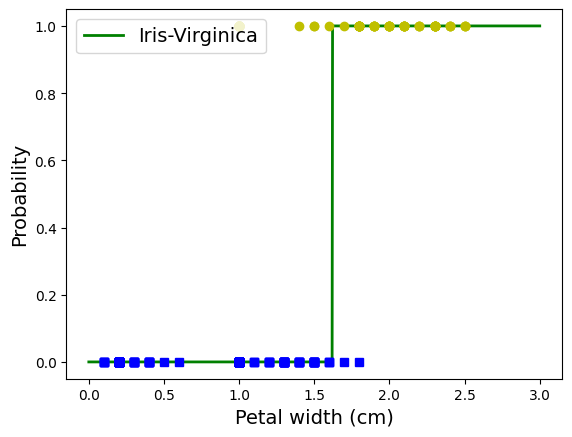

In [41]:
W = fit(X, y, 100, 0.1)

y_hat_new = predict(X_new, W)
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)

# plot the results
import matplotlib.pyplot as plt
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label = "Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Bài 2: Dùng tham số $\theta$ vừa huấn luyện được từ mô hình dự đoán cho 100 dòng dữ liệu đầu tiên từ tập dữ liệu gốc. So sánh kết quả dự đoán với nhãn thực sự của dữ liệu.

In [43]:
w1 = fit(X[1:100], y[1:100], 100, 0.1)

In [44]:
y_compare = predict(X_new, w1)
y_compare = np.where(y_compare >= 0.5, 1, 0)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y[1:100], y_compare[1:100])

1.0

Bài 3: Trong Bước 5, với mỗi lần lặp để cập nhật trọng số, hãy tính giá trị hàm mất mát của mỗi lần lặp và đưa vào list loss. Vẽ biểu đồ giá trị loss sau mỗi lần lặp. 

In [46]:
loss_list = []
def fit_spec(X, y_true, iter, alpha):
    W = initializers(X)
    for i in range(iter):
        z = np.dot(X, W)
        y_hat = sigmoid(z)
        loss = compute_loss(y_true, y_hat)
        loss_list.append(loss)
        gradient = compute_gradient(X, y_true, y_hat)
        W = W - alpha * gradient
    return W
    

<Axes: >

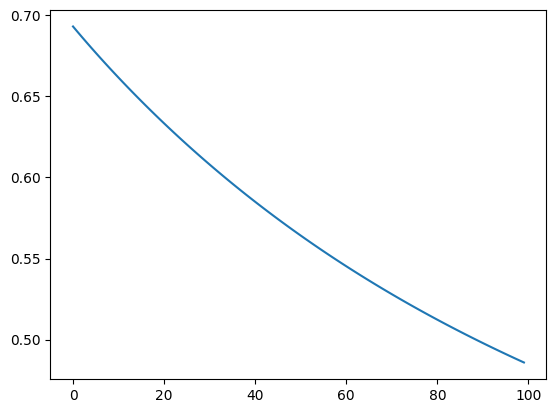

In [47]:
# fit the model and plot the loss
w = fit_spec(X, y, iter=100, alpha=0.1)
from seaborn import lineplot
lineplot(x=range(100), y=loss_list)

Bài 4: Dùng tham số $\theta$ vừa huấn luyện được từ mô hình dự đoán cho dữ liệu X_new.

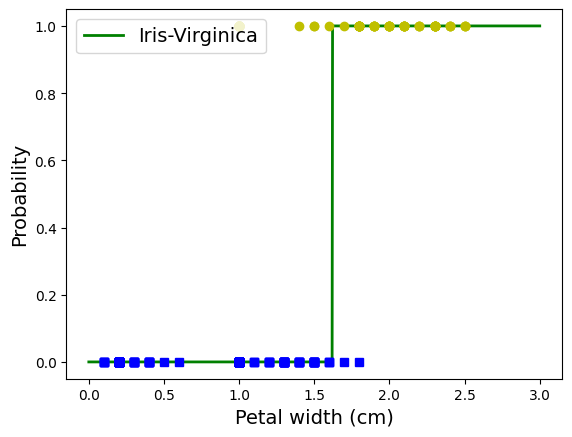

In [48]:
y_hat_new = predict(X_new, w) 
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Bài 5: Các bạn hãy dùng thư viện Logistic Regression trong sklearn để dự đoán, và so sánh kết quả giữa dùng thư viện và làm bằng tay đối với Bài 2 và Bài 4.

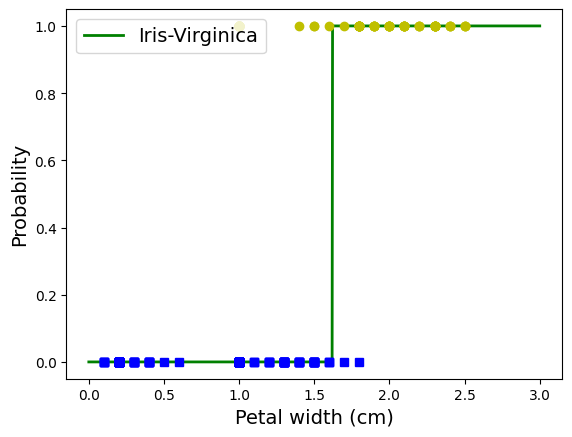

In [50]:
#So sánh với Bài 2.
y_hat_new = predict(X_new, w)
y_hat_new = np.where(y_hat_new >= 0.5, 1, 0)
plt.plot(X_new, y_hat_new, "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

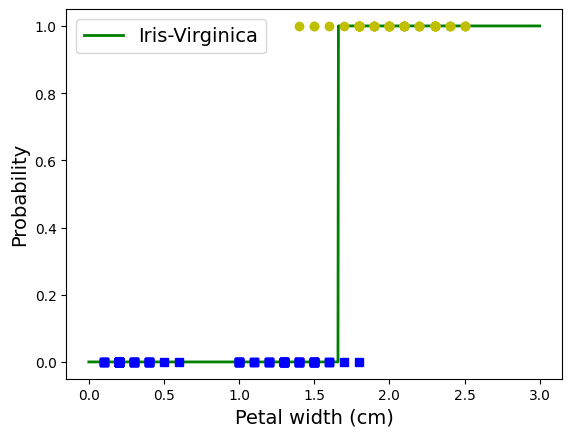

In [58]:
# using sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # create an instance of the class
log_reg.fit(X, y) # fit the model
y_proba = log_reg.predict_proba(X_new) # predict the probability
y_proba = np.where(y_proba >= 0.5, 1, 0) # classify the probability
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "yo")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [60]:
#So sánh với Bài 2
y_compare = predict(X, w)
y_compare = np.where(y_compare >= 0.5, 1, 0)
from sklearn.metrics import accuracy_score
accuracy_score(y[1:100], y_compare[1:100])

0.9797979797979798

In [53]:
y_compare_func= log_reg.predict(x)
accuracy_score(y[1:100], y_compare_func[1:100])

0.9797979797979798

Bài 6*: Hãy sử dụng các thuộc tính khác như Petal Length, Sepal Length và Sepal Width để huấn luyện cho mô hình, và cho biết kết quả. 

In [72]:
#get iris petal length, sepel length, petal width, sepal width
X_all= iris.data[:, :4]
iris.feature_names
y_test = (iris.target == 2).astype(np.int_)

In [73]:
X_all_new = np.concatenate((np.ones((X_all.shape[0], 1)), X_all), axis=1)

In [77]:
# predict with sklearn
log_reg_all = LogisticRegression()
log_reg_all.fit(X_all, y_test)
y_proba_all = log_reg_all.predict_proba(X_all)
y_pred_all = (y_proba_all[:, 1] > 0.5).astype(int)

In [78]:
accuracy = accuracy_score(y_test, y_pred_all)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334


In [80]:
# predict with my model
w = fit_spec(X_all_new, y_test, iter=100, alpha=0.1)
y_compare_all = predict(X_all, w)
y_compare_all = np.where(y_compare_all >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_compare_all)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667
